# Handling imbalance data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("credit.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,39885.0,1.385745,-0.776183,-1.276504,-1.732802,1.456010,3.169421,-0.884741,0.730740,-1.056017,...,-0.621874,-1.564708,0.123824,1.000517,0.209903,0.827916,-0.064076,0.009821,41.94,0
1,160679.0,-1.509015,1.445546,-0.288465,-2.599796,0.031683,-1.161685,0.473007,0.802321,-0.222380,...,-0.202615,-0.777421,-0.045253,-0.348450,0.002970,0.383022,0.076898,0.082978,4.00,0
2,170043.0,-1.329675,1.671851,-0.668253,-1.316477,0.888102,-0.419414,-0.257771,-2.296987,-0.658676,...,-1.505724,-0.501284,0.140584,0.347481,-0.345795,-0.072878,-0.079008,0.114091,1.29,0
3,29820.0,-1.300095,1.004770,1.226453,0.143031,0.302872,-0.473174,1.110003,0.105973,-0.758082,...,-0.357558,-1.149148,0.012885,0.003805,-0.212856,-1.001165,-0.249979,-0.272285,83.00,0
4,84933.0,-1.209733,1.249704,1.185233,-0.112195,0.388526,-0.921451,1.410460,-0.761339,0.480302,...,-0.018978,0.304157,-0.212971,0.377686,0.254317,-0.606180,-0.663626,-0.142206,28.00,0


0    113727
1       196
Name: Class, dtype: int64
---------------------------------------------------


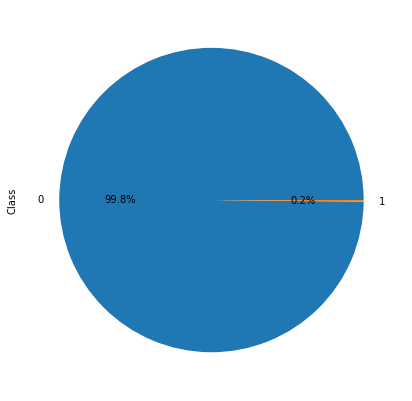

In [4]:
print(df["Class"].value_counts())
print("---------------------------------------------------")
plt.figure(figsize=(7,7))
df["Class"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [5]:
X = df.drop("Class",axis=1)
y = df["Class"]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = lr1.predict(X_test)

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34124
           1       0.78      0.66      0.71        53

    accuracy                           1.00     34177
   macro avg       0.89      0.83      0.86     34177
weighted avg       1.00      1.00      1.00     34177



## Under sampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [11]:
rus = RandomUnderSampler(random_state=1)

In [12]:
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [13]:
pd.Series(y_sample1).value_counts()

1    143
0    143
dtype: int64

In [14]:
lr2 = LogisticRegression()
lr2.fit(X_sample1, y_sample1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred2 = lr2.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     34124
           1       0.02      0.94      0.04        53

    accuracy                           0.92     34177
   macro avg       0.51      0.93      0.50     34177
weighted avg       1.00      0.92      0.96     34177



## Over sampling

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state=1)

In [19]:
X_sample2, y_sample2 = ros.fit_sample(X_train,y_train)

In [20]:
pd.Series(y_sample2).value_counts()

1    79603
0    79603
dtype: int64

In [21]:
lr3 = LogisticRegression()
lr3.fit(X_sample2, y_sample2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred3= lr3.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     34124
           1       0.04      0.92      0.08        53

    accuracy                           0.97     34177
   macro avg       0.52      0.95      0.53     34177
weighted avg       1.00      0.97      0.98     34177

